# Chapter 12 - The Linear Regression


## Listing 12-1. Importing the data and plotting it


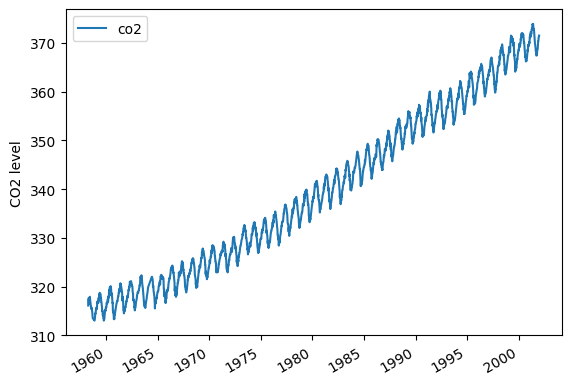

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = sm.datasets.co2.load_pandas()
co2 = data.data.copy()
co2 = co2.dropna()
ax = co2.plot()
ax.set_ylabel("CO2 level")
plt.show()

## Listing 12-2. Creating the variable month


## Listing 12-3. Creating the variable year


In [2]:
co2 = co2.assign(
    month=lambda x: x.index.month,
    year=lambda x: x.index.year,
)

## Listing 12-4. Fitting a Linear Regression with two variables


2026/02/22 17:40:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2026/02/22 17:40:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2026/02/22 17:40:15 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.schemas
2026/02/22 17:40:15 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.tables
2026/02/22 17:40:15 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.types
2026/02/22 17:40:15 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.constraints
2026/02/22 17:40:15 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.defaults
2026/02/22 17:40:15 INFO alembic.runtime.plugins: setup plugin alembic.autogenerate.comments
2026/02/22 17:40:16 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/02/22 17:40:16 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/02/22 17:40:16 INFO mlflow.utils.autologging_utils: Created MLflow autologging run

train_r2=0.9690528910892225, test_r2=0.3433251233951542


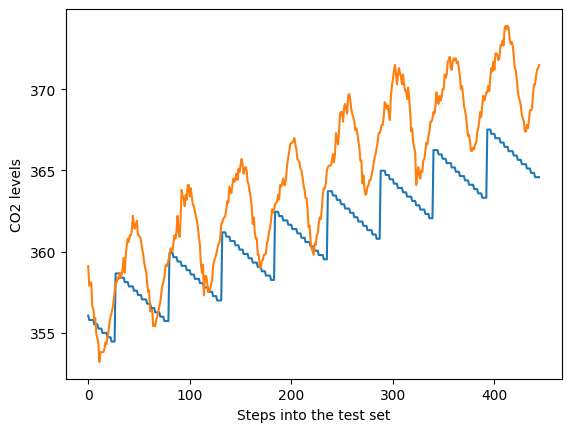

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import mlflow

mlflow.autolog()

# Create X and y objects
X = co2[["year", "month"]]
y = co2["co2"]

# Create Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=12345, shuffle=False
)

# Fit model
my_lm = LinearRegression()
my_lm.fit(X=X_train, y=y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(f"train_r2={train_r2}, test_r2={test_r2}")

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel("Steps into the test set")
plt.ylabel("CO2 levels")
plt.show()

## Listing 12-4. Adding lagged variables into the data


In [4]:
co2 = co2.assign(
    co2_l1=lambda x: x["co2"].shift(1),
    co2_l2=lambda x: x["co2"].shift(2),
    co2_l3=lambda x: x["co2"].shift(3),
    co2_l4=lambda x: x["co2"].shift(4),
    co2_l5=lambda x: x["co2"].shift(5),
)

## Listing 12-5. Drop missing values


In [5]:
co2 = co2.dropna()

## Listing 12-6. Fitting the full Linear Regression model


2026/02/22 17:40:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fee00fa78942464fa09f375ed8d9c601', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2026/02/22 17:40:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\bodau\Documents\Dev\Advanced-Forecasting-with-Python-2nd-ed\Advanced-Forecasting-with-Python-2nd-ed\.venv\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenev

train_r2=0.998797756425323, test_r2=0.9904370120462793


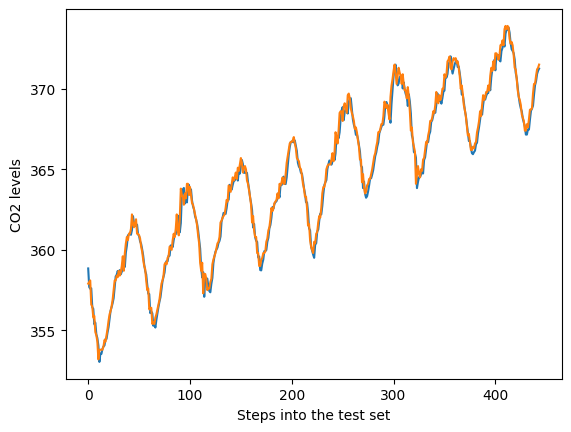

In [ ]:
# Create X and y objects
X = co2[["year", "month", "co2_l1", "co2_l2", "co2_l3", "co2_l4", "co2_l5"]]
y = co2["co2"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=12345, shuffle=False
)

# Fit the model
my_lm = LinearRegression()
my_lm.fit(X=X_train, y=y_train)

train_fcst = my_lm.predict(X_train)
test_fcst = my_lm.predict(X_test)

train_r2 = r2_score(y_train, train_fcst)
test_r2 = r2_score(y_test, test_fcst)

print(f"train_r2={train_r2}, test_r2={test_r2}")

# Plot result
plt.plot(list(test_fcst))
plt.plot(list(y_test))
plt.xlabel("Steps into the test set")
plt.ylabel("CO2 levels")
plt.show()